In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import time
from os import listdir

In [4]:
# Load speaker attributes from Google Drive
speaker_attributes = pd.read_parquet('/content/drive/MyDrive/ADA/Project datasets/speaker_attributes.parquet')
speaker_attributes.shape

(9055981, 15)

In [5]:
# Load dataset containing sport quotes
dataset = pd.read_csv('/content/drive/MyDrive/ADA/ada-sports-quotes/sport-quotes-2016.csv.bz2', compression='bz2')
dataset.shape

(2286930, 10)

In [6]:
dataset.sample(3)

,Unnamed: 0,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
172710,1047956,2016-12-24-050049,We are thrilled to continue working with Mick ...,None,[],2016-12-24 08:59:59,4,"[['None', '0.7121'], ['Mick Schumacher', '0.15...",['http://www.motorsport.com/eurof3/news/schuma...,E
620940,3763539,2016-08-18-110244,There aren't too many games you can hit three ...,Kris Bryant,['Q16234450'],2016-08-18 23:01:46,28,"[['Kris Bryant', '0.6392'], ['None', '0.3577']...",['http://wsbt.com/sports/content/bryant-homers...,E
262964,1594029,2016-09-25-021714,I don't think I have any stronger nerves than ...,None,[],2016-09-25 00:00:00,7,"[['None', '0.6854'], ['Arnold Palmer', '0.3146']]",['http://www.dailygazette.com/news/2016/sep/25...,E


In [7]:
# Removing square brackets and quotation marks from qids to match the speaker_attributes dataset
dataset['qids'] = dataset['qids'].str.strip('[\'\']')
speakers = speaker_attributes[speaker_attributes['id'].isin(dataset['qids'])]

In [8]:
# Removing speakers without any known party
politicians = speakers[~(speakers['party'].isna())]
politicians.shape

(5008, 15)

In [9]:
# Load the database relating qids with wikidata labels
qid_labels = pd.read_csv('/content/drive/MyDrive/ADA/Project datasets/wikidata_labels_descriptions_quotebank.csv.bz2', compression='bz2', index_col='QID')

In [10]:
############# A DISCUTER ################################

# Only keeping the first qid in the party feature
politicians_1_qid = politicians['party'].str.get(0)
politicians_1_qid.shape

(5008,)

In [11]:
# Counts the occurences of each party and merging the corresponding label
party_counts_1_qid = pd.DataFrame(pd.value_counts(politicians_1_qid))
party_counts_label_1_qid = party_counts_1_qid.merge(qid_labels, left_index=True, right_on='QID').rename(columns={'party': 'count'})
party_counts_label_1_qid.head(3)

,count,Label,Description
QID,,,
Q29552,1224,Democratic Party,political party in the United States
Q29468,1173,Republican Party,major political party in the United States
Q9630,148,Labour Party,political party in the United Kingdom


In [12]:
# Setting label of party with count lower than the .99 quantile to 'Others'
threshold_value = party_counts_label_1_qid['count'].quantile(.99)
values_below_thresh = party_counts_label_1_qid['count'] < threshold_value
party_counts_label_1_qid.loc[values_below_thresh,'Label'] = 'Others'

# Plots : pie plot and bar plot

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d7ae74d90>],
      dtype=object)

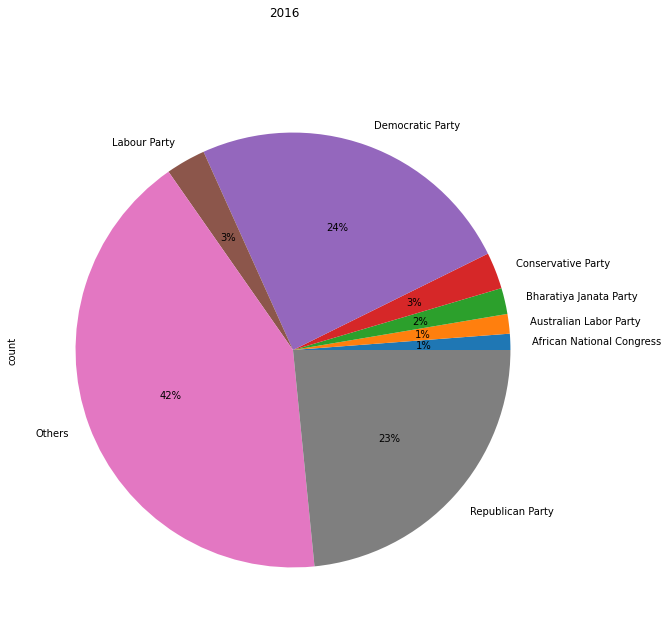

In [13]:
party_counts_label_1_qid.groupby('Label').sum().plot(kind='pie', subplots=True, figsize=(10, 10), legend=False, autopct='%1.f%%', title='2016')

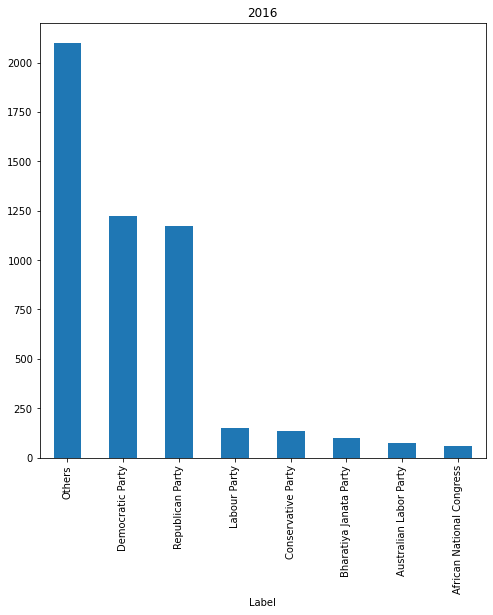

In [14]:
party_counts_label_1_qid.groupby('Label').sum().sort_values(by='count', ascending=False).plot(kind='bar',legend=False, figsize=(8, 8), log=False, title='2016')